# GoogleNet (Inception) Pretrained Pytorch Implementation




### Imports

In [8]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import json
import requests

### Load Pretrained Inception v3 Model

In [3]:
model = models.inception_v3(pretrained=True)
model.eval()  # Set to evaluation mode

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


100%|██████████| 104M/104M [00:00<00:00, 168MB/s] 


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

### Image Transformations

In [4]:
def transform_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)  # Add batch dimension

### Model Inferencing & Loading Class Labels

In [5]:
!wget https://raw.githubusercontent.com/pytorch/hub/refs/heads/master/imagenet_classes.txt

--2026-01-01 05:18:05--  https://raw.githubusercontent.com/pytorch/hub/refs/heads/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2026-01-01 05:18:06 (8.67 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



### Inference

In [6]:
def predict(image_tensor, model):
    with torch.no_grad():
        outputs = model(image_tensor)
    return torch.nn.functional.softmax(outputs, dim=1)[0]

### Load Class Labels

In [7]:
with open("/content/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

### Inferencing & Visualizing Results

In [9]:
# Image Downloader Function
def download_image(url, filename):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(filename, 'wb') as out_file:
            for chunk in response.iter_content(chunk_size=8192):
                out_file.write(chunk)
        print(f"Image downloaded successfully as {filename}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")

### Example 1:

In [10]:
image_url = "https://cdn.britannica.com/08/3408-050-6065D035/blue-peacock-pavo-cristatus-peahen-Indian-Males-harem-females.jpg"
output_filename = "peacock.jpg"
download_image(image_url, output_filename)

Image downloaded successfully as peacock.jpg


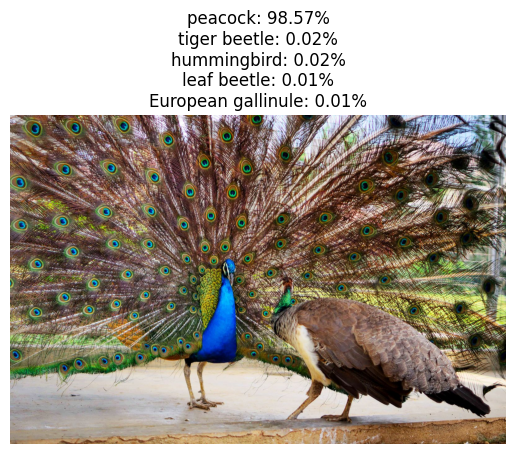

In [11]:
# Visualize Image and Prediction

def visualize(image_path, predictions, labels):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis("off")

    # Get top 5 predictions
    top5_prob, top5_catid = torch.topk(predictions, 5)
    top5_labels = [labels[i] for i in top5_catid]

    # Show predictions
    plt.title("\n".join([f"{label}: {prob:.2%}" for label, prob in zip(top5_labels, top5_prob)]))
    plt.show()

image_path = "/content/peacock.jpg"
image_tensor = transform_image(image_path)
predictions = predict(image_tensor, model)
visualize(image_path, predictions, labels)

### Example 2:

In [12]:
image_url = "https://cdn.britannica.com/33/238533-050-2E2D04F4/Indian-cobra-naja-naja-venonmous-snake-reptile-hood.jpg"
output_filename = "Ind_cobra.jpg"
download_image(image_url, output_filename)

Image downloaded successfully as Ind_cobra.jpg


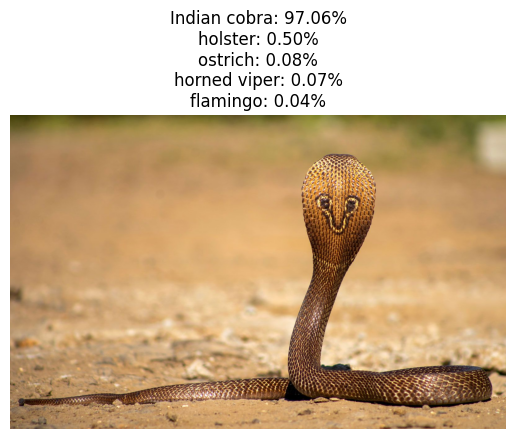

In [13]:
# Visualize Image and Prediction
def visualize(image_path, predictions, labels):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis("off")

    # Get top 5 predictions
    top5_prob, top5_catid = torch.topk(predictions, 5)
    top5_labels = [labels[i] for i in top5_catid]

    # Show predictions
    plt.title("\n".join([f"{label}: {prob:.2%}" for label, prob in zip(top5_labels, top5_prob)]))
    plt.show()

image_path = "/content/Ind_cobra.jpg"
image_tensor = transform_image(image_path)
predictions = predict(image_tensor, model)
visualize(image_path, predictions, labels)